In [1]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
os. getcwd()

'C:\\Users\\Sadgi Sharma'

In [5]:
churn=pd.read_csv('churn.csv')

In [6]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
churn.TotalCharges=pd.to_numeric(churn.TotalCharges, errors="coerce")

In [12]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
churn.isnull().sum(0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
churn.dropna(inplace=True)

In [15]:
churn.isnull().sum(0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df=churn.iloc[:,1:]

In [10]:
df["Churn"].replace(to_replace='Yes',value=1, inplace=True)
df["Churn"].replace(to_replace='No', value=0, inplace=True)

In [11]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [12]:
df_dummies=pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [58]:
df_dummies.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


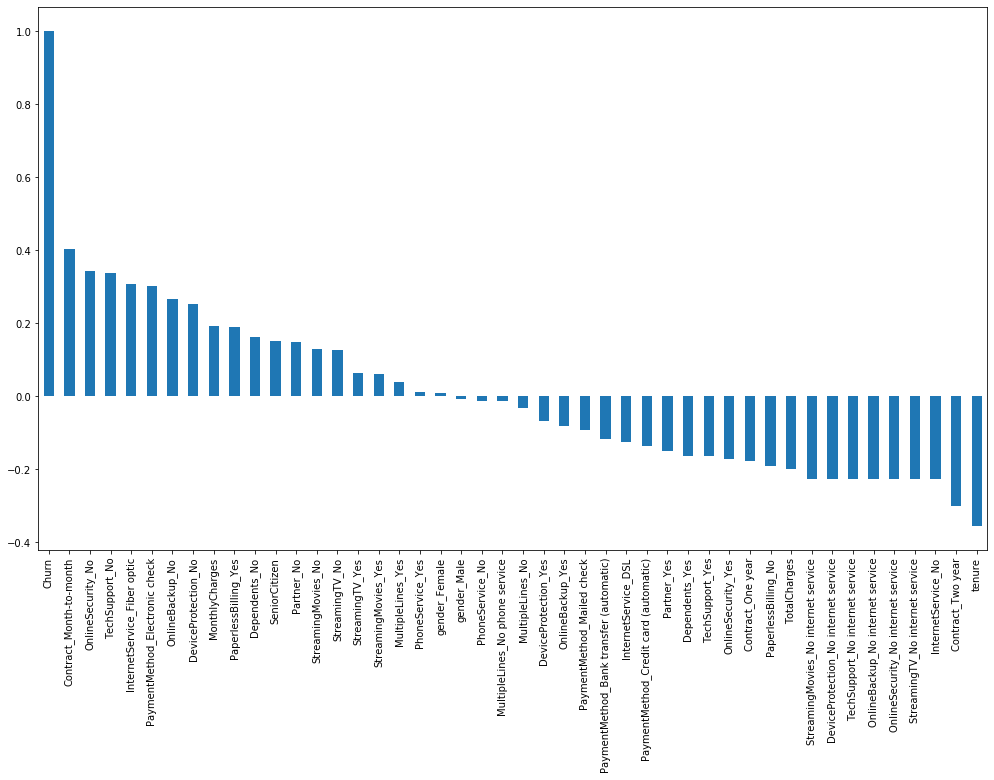

In [20]:
plt.figure(figsize=(17,10))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

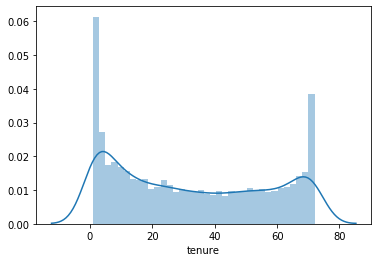

In [21]:
ax=sns.distplot(churn['tenure'], hist=True, bins=int(180/5))

In [22]:
import seaborn as sns

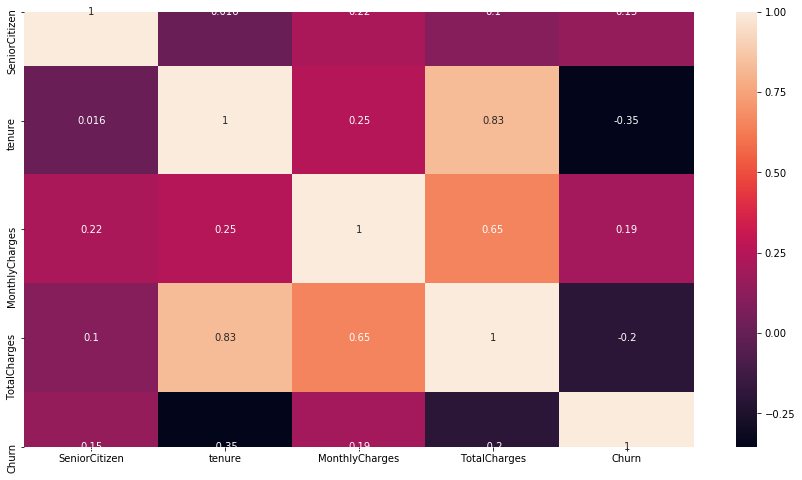

In [23]:
plt.figure(figsize=(15,8))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [13]:
y=df_dummies['Churn'].values
X=df_dummies.drop(columns=['Churn'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
features=X.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))
X.columns=features

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105)

In [16]:
from imblearn.over_sampling import SMOTE

F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classe

In [21]:
df1=pd.get_dummies(df, columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [22]:
df1=df1.drop(columns=[
'OnlineSecurity_No','TechSupport_No','OnlineBackup_No','gender_Female','PaperlessBilling_No',
    'MultipleLines_No','StreamingMovies_No','Partner_No','Dependents_No','SeniorCitizen_1',
    'StreamingTV_No','PhoneService_No','PhoneService_Yes','MultipleLines_No phone service',
    'TechSupport_No internet service','StreamingTV_No internet service',
    'OnlineSecurity_No internet service','OnlineBackup_No internet service',
    'StreamingMovies_No internet service','DeviceProtection_No internet service',
    'InternetService_No'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
y=df1['Churn']
X=df1.drop(['Churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train.columns

In [25]:
from sklearn.ensemble import RandomForestClassifier
m1= RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.7, n_jobs=-1, oob_score=True)
m1.fit(X_train,y_train)
m1.score(X_test,y_test)

0.7933649289099526

In [26]:
os = SMOTE(random_state=41)

os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Churn"])

F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
from sklearn.model_selection import train_test_split
y=os_data_y
X=os_data_X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train.columns

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
clf.fit(X_train,y_train)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
clf.score(X_test,y_test)

0.8558891454965358

In [31]:
from sklearn import metrics
predict_test = clf.predict(X_test)

In [32]:
print (metrics.accuracy_score(y_test, predict_test))
print (metrics.f1_score(y_test,predict_test))
print (metrics.recall_score(y_test,predict_test))
print (metrics.precision_score(y_test,predict_test))
print (metrics.roc_auc_score(y_test,predict_test))

0.8558891454965358
0.8563535911602211
0.8446866485013624
0.8683473389355743
0.8560839257544406


In [35]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
ada_pred= model_ada.predict(X_test)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print (metrics.accuracy_score(y_test, ada_pred))
print (metrics.f1_score(y_test,ada_pred))
print (metrics.recall_score(y_test,ada_pred))
print (metrics.precision_score(y_test,ada_pred))
print (metrics.roc_auc_score(y_test,ada_pred))

0.8475750577367206
0.8504079782411604
0.851952770208901
0.848868778280543
0.847498941495428


In [37]:
from xgboost import XGBClassifier
model_xgb= XGBClassifier()
model_xgb.fit(X_train,y_train)
xgbpred= model_xgb.predict(X_test)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
model_xgb.score(X_test,y_test)

0.8660508083140878

In [38]:
print (metrics.accuracy_score(y_test, xgbpred))
print (metrics.f1_score(y_test, xgbpred))
print (metrics.recall_score(y_test,xgbpred))
print (metrics.precision_score(y_test,xgbpred))
print (metrics.roc_auc_score(y_test,xgbpred))

0.8660508083140878
0.867579908675799
0.8628519527702089
0.8723599632690542
0.8661064275129241


In [39]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

In [40]:
rnnmodel=Sequential()

In [41]:
X_train.shape[1]

25

In [42]:
rnnmodel.add(Dense(16, input_dim=25, activation='relu', kernel_constraint=maxnorm(3)))

In [43]:
rnnmodel.add(Dropout(rate=0.2))
rnnmodel.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
rnnmodel.add(Dropout(rate=0.2))
rnnmodel.add(Dense(1, activation='sigmoid'))

In [44]:
rnnmodel.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])


In [54]:
history = rnnmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=10)


Train on 5051 samples, validate on 2165 samples
Epoch 1/20
5051/5051 [==============================] - 2s 480us/step - loss: 0.5702 - accuracy: 0.7133 - val_loss: 0.5159 - val_accuracy: 0.7469
Epoch 2/20
5051/5051 [==============================] - 2s 476us/step - loss: 0.5634 - accuracy: 0.7133 - val_loss: 0.5266 - val_accuracy: 0.7441
Epoch 3/20
5051/5051 [==============================] - 2s 478us/step - loss: 0.5675 - accuracy: 0.7203 - val_loss: 0.5066 - val_accuracy: 0.7460
Epoch 4/20
5051/5051 [==============================] - 2s 472us/step - loss: 0.5562 - accuracy: 0.7173 - val_loss: 0.5216 - val_accuracy: 0.7400
Epoch 5/20
5051/5051 [==============================] - 2s 482us/step - loss: 0.5724 - accuracy: 0.7024 - val_loss: 0.5355 - val_accuracy: 0.7427
Epoch 6/20
5051/5051 [==============================] - 3s 510us/step - loss: 0.5597 - accuracy: 0.7133 - val_loss: 0.5507 - val_accuracy: 0.7109
Epoch 7/20
5051/5051 [==============================] - 3s 505us/step - loss

In [60]:
rnnpred= rnnmodel.predict(X_test)

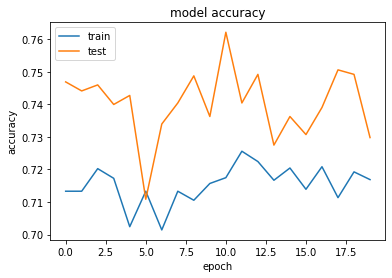

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
print(history.history['accuracy'])

[0.71332407, 0.71332407, 0.7202534, 0.7172837, 0.70243514, 0.71332407, 0.7014453, 0.71332407, 0.7105524, 0.71569985, 0.7174817, 0.7255989, 0.7224312, 0.71668977, 0.7204514, 0.71391803, 0.72084737, 0.7113443, 0.7192635, 0.7168878]


In [56]:
rnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
